# 분산 분석 기반의 카테고리 분석

회귀 분석 대상이 되는 독립 변수가 카테고리 값을 가지는 변수인 경우에는 카테고리 값에 의해 종속 변수인 y값이 달라진다. 이러한 경우, 분산 분석(ANOVA)을 사용하면 카테고리 값의 영향을 정량적으로 분석할 수 있다. 또한 이는 카테고리 값에 의해 회귀 모형이 달라지는 것으로도 볼 수 있기 때문에 모형 비교에도 사용될 수 있다.

## 카테고리 독립 변수와 더미 변수

카테고리 값은 여러개의 다른 상태를 나타내는 값이다. 분석시에는 편의상 이 값은 0, 1과 같은 정수로 표현하지만 원래 카테고리값은 1, 2, 3과 같이 숫자로 표현되어 있어도 이는 단지 "A", "B", "C"라는 라벨을 숫자로 대신 쓴 것에 지나지 않으며 실제로 크기의 의미가 없다는 점에 주의해야 한다. 즉, 2라는 값이 1보다 2배 더 크다는 뜻이 아니고 3이라는 값도 1보다 3배 더 크다는 뜻이 아니다.

따라서 카테고리 값을 그냥 정수로 쓰면  회귀 분석 모형은 이 값을 크기를 가진 숫자로 인식할 수 있는 위험이 있기 때문에 반드시 one-hot-encoding 등을 통해 더미 변수(dummy variable)의 형태로 변환해야 함

더미 변수는 0 또는 1만으로 표현되는 값으로 어떤 요인이 존재하는가 존재하지 않는가를 표시하는 독립 변수이다. 다음과 같은 명칭으로도 불린다.

* indicator variable
* design variable
* Boolean indicator
* binary variable
* treatment

In [1]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

In [2]:
x0 = np.random.choice(3, 10)
x0

array([1, 0, 1, 1, 2, 2, 2, 1, 2, 2])

In [3]:
encoder.fit(x0[:, np.newaxis])
X = encoder.transform(x0[:, np.newaxis]).toarray()
X

array([[ 0.,  1.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.]])

In [4]:
dfX = pd.DataFrame(X, columns=encoder.active_features_)
dfX

,0,1,2
0,0.0,1.0,0.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,0.0,1.0
5,0.0,0.0,1.0
6,0.0,0.0,1.0
7,0.0,1.0,0.0
8,0.0,0.0,1.0
9,0.0,0.0,1.0


## 더미 변수와 모형 비교

더미 변수를 사용하면 사실상 회귀 모형 복수개를 동시에 사용하는 것과 실질적으로 동일하다.

### 더미 변수의 예 1


$$ Y = \alpha_{1} + \alpha_{2} D_2 + \alpha_{3} D_3  $$


* $D_2 = 0, D_3 = 0$ 이면 $Y = \alpha_{1} $
* $D_2 = 1, D_3 = 0$ 이면 $Y = \alpha_{1} + \alpha_{2} $
* $D_2 = 0, D_3 = 1$ 이면 $Y = \alpha_{1} + \alpha_{3} $


<img src="https://upload.wikimedia.org/wikipedia/commons/6/61/Anova_graph.jpg" style="width:70%; margin: 0 auto 0 auto;">

### 더미 변수의 예 2

$$ Y = \alpha_{1} + \alpha_{2} D_2 + \alpha_{3} D_3  + \alpha_{4} X $$


* $D_2 = 0, D_3 = 0$ 이면 $Y = \alpha_{1}  + \alpha_{4} X $
* $D_2 = 1, D_3 = 0$ 이면 $Y = \alpha_{1} + \alpha_{2}  + \alpha_{4} X $
* $D_2 = 0, D_3 = 1$ 이면 $Y = \alpha_{1} + \alpha_{3}  + \alpha_{4} X $


<img src="https://upload.wikimedia.org/wikipedia/commons/2/20/Ancova_graph.jpg" style="width:70%; margin: 0 auto 0 auto;">

### 더미 변수의 예 3

$$ Y = \alpha_{1} + \alpha_{2} D_2 + \alpha_{3} D_3  + \alpha_{4} X + \alpha_{5} D_4 X + \alpha_{6} D_5 X  $$


* $D_2 = 0, D_3 = 0$ 이면 $Y = \alpha_{1} + \alpha_{4} X $
* $D_2 = 1, D_3 = 0$ 이면 $Y = \alpha_{1} + \alpha_{2}  + (\alpha_{4} + \alpha_{5}) X $
* $D_2 = 0, D_3 = 1$ 이면 $Y = \alpha_{1} + \alpha_{3}  + (\alpha_{4} + \alpha_{6}) X $


<img src="https://docs.google.com/drawings/d/1U1ahMIzvOq74T90ZDuX5YOQJ0YnSJmUhgQhjhV4Xj6c/pub?w=1428&h=622" style="width:90%; margin: 0 auto 0 auto;">

### 더미 변수의 예 4: Boston Dataset

In [5]:
from sklearn.datasets import load_boston
boston = load_boston()
dfX0_boston = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy_boston = pd.DataFrame(boston.target, columns=["MEDV"])

import statsmodels.api as sm
dfX_boston = sm.add_constant(dfX0_boston)

df_boston = pd.concat([dfX_boston, dfy_boston], axis=1)
df_boston.tail()

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,1,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,1,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,1,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,1,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,1,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


array([ 0.,  1.])

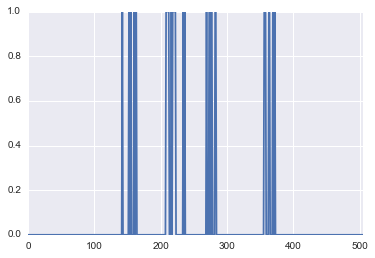

In [6]:
dfX_boston.CHAS.plot()
dfX_boston.CHAS.unique()

In [7]:
model = sm.OLS(dfy_boston, dfX_boston)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 08 Sep 2016   Prob (F-statistic):          6.95e-135
Time:                        08:22:04   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         36.4911      5.104      7.149      0.0

- interation(인터렉션)은 더미변수 D와 X가 동시에 들어가는 경우
- 만약 찰스가 1이라서 조망권이 있을 때 방이 많을수록 가격이 더 많이 띄게 되는 경우가 생긴다. 이럴 때 포뮬라를 쓰면 된다.
- df_boston.boxplot("MEDV", "CHAS") => 강변에 있는 게 진짜 프리미엄이 있는가
- 2가지 방법이 있었다. 싱글 F ~~
- anova test. F test. 상관계수가 1개일 경우에는 이걸 쓰면 된다.

In [8]:
params1 = result.params.drop("CHAS")
params1

const      36.491103
CRIM       -0.107171
ZN          0.046395
INDUS       0.020860
NOX       -17.795759
RM          3.804752
AGE         0.000751
DIS        -1.475759
RAD         0.305655
TAX        -0.012329
PTRATIO    -0.953464
B           0.009393
LSTAT      -0.525467
dtype: float64

In [10]:
params2 = params1.copy()
params2["const"] += result.params["CHAS"]
params2

const      39.179665
CRIM       -0.107171
ZN          0.046395
INDUS       0.020860
NOX       -17.795759
RM          3.804752
AGE         0.000751
DIS        -1.475759
RAD         0.305655
TAX        -0.012329
PTRATIO    -0.953464
B           0.009393
LSTAT      -0.525467
dtype: float64

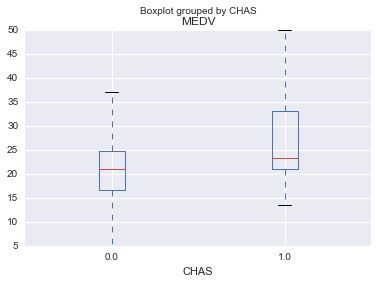

In [11]:
df_boston.boxplot("MEDV", "CHAS")
plt.show()

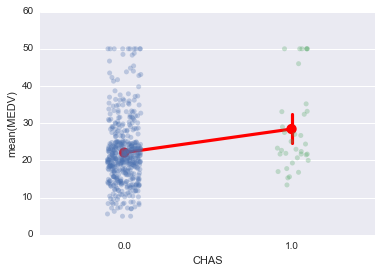

In [15]:
sns.stripplot(x="CHAS", y="MEDV", data=df_boston, jitter=True, alpha=.3)
sns.pointplot(x="CHAS", y="MEDV", data=df_boston, dodge=True, color='r')
plt.show()

## 분산 분석을 이용한 모형 비교

$K$개의 복수의 카테고리 값을 가지는 더미 변수의 영향을 보기 위해서는 F-검정을 통해 복수 개의 모형을 비교하는 분산 분석을 사용할 수 있다. 

이 경우에는 분산 분석에 사용되는 각 분산의 의미가 다음과 같다.

* ESS: 각 그룹 평균의 분산 (Between-Group Variance) 
  $$ BSS = \sum_{k=1}^K (\bar{x} - \bar{x}_k)^2 $$

* RSS: 각 그룹 내의 오차의 분산의 합 (Within-Group Variance)
  $$ WSS = \sum_{k=1}^K \sum_{i} (x_{i} - \bar{x}_k)^2 $$

* TSS : 전체 오차의 분산
  $$ TSS = \sum_{i} (x_{i} - \bar{x})^2 $$



| | source  | degree of freedom | mean square | F statstics | 
|-|-|-|-|-|
| Between | $$\text{BSS}$$ | $$K-1$$ | $$\dfrac{\text{ESS}}{K-1}$$   | $$F$$ |
| Within   | $$\text{WSS}$$ | $$N-K$$ | $$\dfrac{\text{RSS}}{N-K}$$ |
| Total      | $$\text{TSS}$$ | $$N-1$$ | $$\dfrac{\text{TSS}}{N-1}$$ |
| $R^2$      | $$\text{BSS} / \text{TSS}$$ | 


이 때 F-검정의 귀무가설은 $\text{BSS}=0$ 즉 $\text{WSS}=\text{TSS}$ 이다. 즉, 그룹간 차이가 없는 경우이다.

- 변수 선택에 있어서 global optic한 것을 찾는 것이 어렵다.
- F값은 RM mean에서 residual mean으로 나눈 것(ANOVA 맨 밑에 result)
- stats모델에는 별로 없고 sklearn에 패키지가 많다. 그래서 둘 다 할 줄 알아야 하고 조합할 줄 알아야 함

In [16]:
import statsmodels.api as sm
model = sm.OLS.from_formula("MEDV ~ C(CHAS)", data=df_boston)
result = model.fit()
table = sm.stats.anova_lm(result)
table

,df,sum_sq,mean_sq,F,PR(>F)
C(CHAS),1.0,1312.079271,1312.079271,15.971512,0.000074
Residual,504.0,41404.216144,82.151223,NaN,NaN


In [18]:
model1 = sm.OLS.from_formula("MEDV ~ CRIM + ZN +INDUS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT", data=df_boston)
model2 = sm.OLS.from_formula("MEDV ~ CRIM + ZN +INDUS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT + C(CHAS)", data=df_boston)
result1 = model1.fit()
result2 = model2.fit()
table = sm.stats.anova_lm(result1, result2)
table

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,493.0,11299.555411,0.0,NaN,NaN,NaN
1,492.0,11080.276284,1.0,219.279126,9.7367,0.001912
